In [1]:
import pandas as pd
from binance.client import Client
import numpy as np

In [2]:
client = Client()

In [3]:
info = client.get_exchange_info()

In [4]:
##gettignjust the symbols from the info
symbols = [x['symbol'] for x in info['symbols']]

In [5]:
relevant = [symbol for symbol in symbols if symbol.endswith('USDT')]

In [6]:
def getdailydata(symbol):
    frame = pd.DataFrame(client.get_historical_klines(symbol,
                                                     '1d','365 days ago AEST'))
    if len(frame) > 0:
        frame = frame.iloc[:,:5]
        frame.columns = ['Time','Open','High','Low','Close']
        frame = frame.set_index('Time')
        frame.index = pd.to_datetime(frame.index, unit='ms')
        frame = frame.astype(float)
        return frame

In [7]:
getdailydata('LINKUSDT')

,Open,High,Low,Close
Time,,,,
2021-01-26,23.3418,23.9761,21.6500,23.0981
2021-01-27,23.0914,23.2295,20.2767,20.9586
2021-01-28,20.9586,24.4716,20.5010,23.0145
2021-01-29,22.9869,24.2400,22.0450,22.7480
2021-01-30,22.7480,23.9800,22.1534,23.6399
...,...,...,...,...
2022-01-21,20.1800,20.5100,17.1000,17.4200
2022-01-22,17.4100,17.8200,14.2400,15.8500
2022-01-23,15.8600,16.8800,15.1500,16.6400


In [8]:
dfs = []
for coin in relevant:
    dfs.append(getdailydata(coin))

In [10]:
#putting the coin name to the dfs
dict(zip(relevant,dfs))

{'BTCUSDT':                 Open      High       Low     Close
 Time                                              
 2021-01-26  32254.19  32921.88  30837.37  32467.77
 2021-01-27  32464.01  32557.29  29241.72  30366.15
 2021-01-28  30362.19  33783.98  29842.10  33364.86
 2021-01-29  33368.18  38531.90  31915.40  34252.20
 2021-01-30  34246.28  34933.00  32825.00  34262.88
 ...              ...       ...       ...       ...
 2022-01-21  40680.92  41100.00  35440.45  36445.31
 2022-01-22  36445.31  36835.22  34008.00  35071.42
 2022-01-23  35071.42  36499.00  34601.01  36244.55
 2022-01-24  36244.55  37550.00  32917.17  36660.35
 2022-01-25  36660.35  36800.00  35701.00  36380.67
 
 [365 rows x 4 columns],
 'ETHUSDT':                Open     High      Low    Close
 Time                                          
 2021-01-26  1317.60  1378.49  1244.56  1365.97
 2021-01-27  1366.54  1373.90  1207.00  1239.03
 2021-01-28  1238.93  1360.00  1217.23  1329.69
 2021-01-29  1329.44  1436.90  1285

In [11]:
pd.concat(dict(zip(relevant,dfs)), axis=1)

BTCUSDT                                ETHUSDT                    \
                Open      High       Low     Close     Open     High      Low   
Time                                                                            
2021-01-26  32254.19  32921.88  30837.37  32467.77  1317.60  1378.49  1244.56   
2021-01-27  32464.01  32557.29  29241.72  30366.15  1366.54  1373.90  1207.00   
2021-01-28  30362.19  33783.98  29842.10  33364.86  1238.93  1360.00  1217.23   
2021-01-29  33368.18  38531.90  31915.40  34252.20  1329.44  1436.90  1285.35   
2021-01-30  34246.28  34933.00  32825.00  34262.88  1379.56  1406.00  1326.41   
...              ...       ...       ...       ...      ...      ...      ...   
2022-01-21  40680.92  41100.00  35440.45  36445.31  3001.48  3034.12  2403.00   
2022-01-22  36445.31  36835.22  34008.00  35071.42  2567.47  2626.00  2300.00   
2022-01-23  35071.42  36499.00  34601.01  36244.55  2412.18  2556.78  2370.80   
2022-01-24  36244.55  37550.00  32917.17  36660.35  2539.00  2539.75  2159.00   
2022-01-25  36660.35  36800.00  35701.00  36380.67  2439.56  2453.06  2348.96   

                      BNBUSDT            ... API3USDT         BTTCUSDT  \
              Close      Open      High  ...      Low  Close      Open   
Time                                     ...                             
2021-01-26  1365.97   41.8347   42.5980  ...      NaN    NaN       NaN   
2021-01-27  1239.03   41.8397   42.0984  ...      NaN    NaN       NaN   
2021-01-28  1329.69   40.8957   43.0850  ...      NaN    NaN       NaN   
2021-01-29  1379.50   42.5277   44.0000  ...      NaN    NaN       NaN   
2021-01-30  1378.05   42.8653   45.1071  ...      NaN    NaN       NaN   
...             ...       ...       ...  ...      ...    ...       ...   
2022-01-21  2568.15  440.2000  444.6000  ...    4.052  4.670       NaN   
2022-01-22  2412.18  383.8000  389.6000  ...    4.546  4.835       NaN   
2022-01-23  2539.01  358.3000  389.0000  ...    4.226  4.378       NaN   
2022-01-24  2439.29  384.0000  384.0000  ...    3.500  3.920       NaN   
2022-01-25  2423.58  371.2000  376.2000  ...    3.646  3.797  0.000002   

                                         ANCUSDT                     
                High       Low     Close    Open  High   Low  Close  
Time                                                                 
2021-01-26       NaN       NaN       NaN     NaN   NaN   NaN    NaN  
2021-01-27       NaN       NaN       NaN     NaN   NaN   NaN    NaN  
2021-01-28       NaN       NaN       NaN     NaN   NaN   NaN    NaN  
2021-01-29       NaN       NaN       NaN     NaN   NaN   NaN    NaN  
2021-01-30       NaN       NaN       NaN     NaN   NaN   NaN    NaN  
...              ...       ...       ...     ...   ...   ...    ...  
2022-01-21       NaN       NaN       NaN     NaN   NaN   NaN    NaN  
2022-01-22       NaN       NaN       NaN     NaN   NaN   NaN    NaN  
2022-01-23       NaN       NaN       NaN     NaN   NaN   NaN    NaN  
2022-01-24       NaN       NaN       NaN     NaN   NaN   NaN    NaN  
2022-01-25  0.000003  0.000002  0.000002    1.55  1.98  1.55  1.642  

[365 rows x 1440 columns]

In [12]:
df = pd.concat(dict(zip(relevant,dfs)), axis=1)

In [13]:
closedf = df.loc[:,df.columns.get_level_values(1).isin(['Close'])]

In [14]:
closedf.columns = closedf.columns.droplevel(1)

In [15]:
closedf

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,TUSDUSDT,...,USTUSDT,JOEUSDT,ACHUSDT,IMXUSDT,GLMRUSDT,LOKAUSDT,SCRTUSDT,API3USDT,BTTCUSDT,ANCUSDT
Time,,,,,,,,,,,,,,,,,,,,,
2021-01-26,32467.77,1365.97,41.8396,23.158,134.67,3.434,0.34330,0.26834,2.6278,0.9989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-27,30366.15,1239.03,40.8826,21.033,122.44,3.112,0.31144,0.25039,2.5001,0.9981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-28,33364.86,1329.69,42.5254,22.245,133.27,3.271,0.34409,0.26407,2.7090,0.9975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-29,34252.20,1379.50,42.8618,22.549,134.65,3.307,0.34752,0.28290,2.7232,0.9996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-30,34262.88,1378.05,44.7849,22.864,133.36,3.297,0.36400,0.44372,2.9319,0.9988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21,36445.31,2568.15,383.9000,19.560,114.50,6.136,1.12000,0.63680,2.3700,0.9999,...,1.0000,0.899,0.04158,2.710,8.6571,1.8521,6.249,4.670,NaN,NaN
2022-01-22,35071.42,2412.18,358.3000,17.840,108.40,5.589,1.07100,0.59660,2.2220,0.9998,...,1.0002,0.773,0.03648,2.454,7.4271,1.5889,5.607,4.835,NaN,NaN
2022-01-23,36244.55,2539.01,383.9000,18.610,112.30,5.815,1.12400,0.62830,2.2730,0.9999,...,0.9998,0.852,0.03983,2.503,8.0164,1.7428,5.720,4.378,NaN,NaN


In [16]:
logretdf = np.log(closedf.pct_change() + 1)

In [17]:
#correlatin matrix for every coin
logretdf.corr()

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,TUSDUSDT,...,USTUSDT,JOEUSDT,ACHUSDT,IMXUSDT,GLMRUSDT,LOKAUSDT,SCRTUSDT,API3USDT,BTTCUSDT,ANCUSDT
BTCUSDT,1.000000,0.803818,0.655529,0.736165,0.790031,0.639105,0.607141,0.601611,0.700134,-0.019656,...,0.109688,0.767528,0.445083,0.729423,0.012721,0.937925,0.760563,-0.934607,NaN,NaN
ETHUSDT,0.803818,1.000000,0.681459,0.758229,0.816348,0.687646,0.631284,0.620396,0.731612,-0.025568,...,0.103060,0.854225,0.433784,0.777025,0.070766,0.969971,0.876662,-0.562851,NaN,NaN
BNBUSDT,0.655529,0.681459,1.000000,0.701232,0.662061,0.625639,0.562406,0.556674,0.630101,0.066205,...,0.064671,0.874021,0.319134,0.709115,0.107877,0.981390,0.902681,-0.603331,NaN,NaN
NEOUSDT,0.736165,0.758229,0.701232,1.000000,0.807366,0.807708,0.656722,0.643066,0.814072,-0.004625,...,0.270551,0.796545,0.386053,0.713748,0.035554,0.996367,0.938933,-0.761249,NaN,NaN
LTCUSDT,0.790031,0.816348,0.662061,0.807366,1.000000,0.742911,0.664684,0.685542,0.814991,0.064978,...,-0.020123,0.706825,0.302591,0.570419,0.011555,0.975261,0.877495,-0.682038,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOKAUSDT,0.937925,0.969971,0.981390,0.996367,0.975261,0.976904,0.872480,0.971254,0.995376,-0.128422,...,0.281711,0.996174,0.971583,0.958281,0.888692,1.000000,0.975799,-0.716267,NaN,NaN
SCRTUSDT,0.760563,0.876662,0.902681,0.938933,0.877495,0.954779,0.609033,0.841695,0.976917,0.511521,...,-0.801589,0.964732,0.968893,0.956343,0.958682,0.975799,1.000000,-0.607782,NaN,NaN
API3USDT,-0.934607,-0.562851,-0.603331,-0.761249,-0.682038,-0.511080,-0.390185,-0.698783,-0.609106,-0.143054,...,0.032203,-0.642651,-0.492036,-0.359487,-0.608911,-0.716267,-0.607782,1.000000,NaN,NaN
BTTCUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
import seaborn as sns 

In [19]:
sns.set(rc = {'figure.figsize':(50,30)})

In [21]:
logretdf.corr()

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,TUSDUSDT,...,USTUSDT,JOEUSDT,ACHUSDT,IMXUSDT,GLMRUSDT,LOKAUSDT,SCRTUSDT,API3USDT,BTTCUSDT,ANCUSDT
BTCUSDT,1.000000,0.803818,0.655529,0.736165,0.790031,0.639105,0.607141,0.601611,0.700134,-0.019656,...,0.109688,0.767528,0.445083,0.729423,0.012721,0.937925,0.760563,-0.934607,NaN,NaN
ETHUSDT,0.803818,1.000000,0.681459,0.758229,0.816348,0.687646,0.631284,0.620396,0.731612,-0.025568,...,0.103060,0.854225,0.433784,0.777025,0.070766,0.969971,0.876662,-0.562851,NaN,NaN
BNBUSDT,0.655529,0.681459,1.000000,0.701232,0.662061,0.625639,0.562406,0.556674,0.630101,0.066205,...,0.064671,0.874021,0.319134,0.709115,0.107877,0.981390,0.902681,-0.603331,NaN,NaN
NEOUSDT,0.736165,0.758229,0.701232,1.000000,0.807366,0.807708,0.656722,0.643066,0.814072,-0.004625,...,0.270551,0.796545,0.386053,0.713748,0.035554,0.996367,0.938933,-0.761249,NaN,NaN
LTCUSDT,0.790031,0.816348,0.662061,0.807366,1.000000,0.742911,0.664684,0.685542,0.814991,0.064978,...,-0.020123,0.706825,0.302591,0.570419,0.011555,0.975261,0.877495,-0.682038,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOKAUSDT,0.937925,0.969971,0.981390,0.996367,0.975261,0.976904,0.872480,0.971254,0.995376,-0.128422,...,0.281711,0.996174,0.971583,0.958281,0.888692,1.000000,0.975799,-0.716267,NaN,NaN
SCRTUSDT,0.760563,0.876662,0.902681,0.938933,0.877495,0.954779,0.609033,0.841695,0.976917,0.511521,...,-0.801589,0.964732,0.968893,0.956343,0.958682,0.975799,1.000000,-0.607782,NaN,NaN
API3USDT,-0.934607,-0.562851,-0.603331,-0.761249,-0.682038,-0.511080,-0.390185,-0.698783,-0.609106,-0.143054,...,0.032203,-0.642651,-0.492036,-0.359487,-0.608911,-0.716267,-0.607782,1.000000,NaN,NaN
BTTCUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
logretdf[['LINKUSDT','ETHUSDT','BTCUSDT','ADAUSDT','DOGEUSDT']].corr()

,LINKUSDT,ETHUSDT,BTCUSDT,ADAUSDT,DOGEUSDT
LINKUSDT,1.000000,0.827257,0.720806,0.651473,0.387188
ETHUSDT,0.827257,1.000000,0.803818,0.631284,0.377454
BTCUSDT,0.720806,0.803818,1.000000,0.607141,0.394160
ADAUSDT,0.651473,0.631284,0.607141,1.000000,0.334803
DOGEUSDT,0.387188,0.377454,0.394160,0.334803,1.000000


<AxesSubplot:>

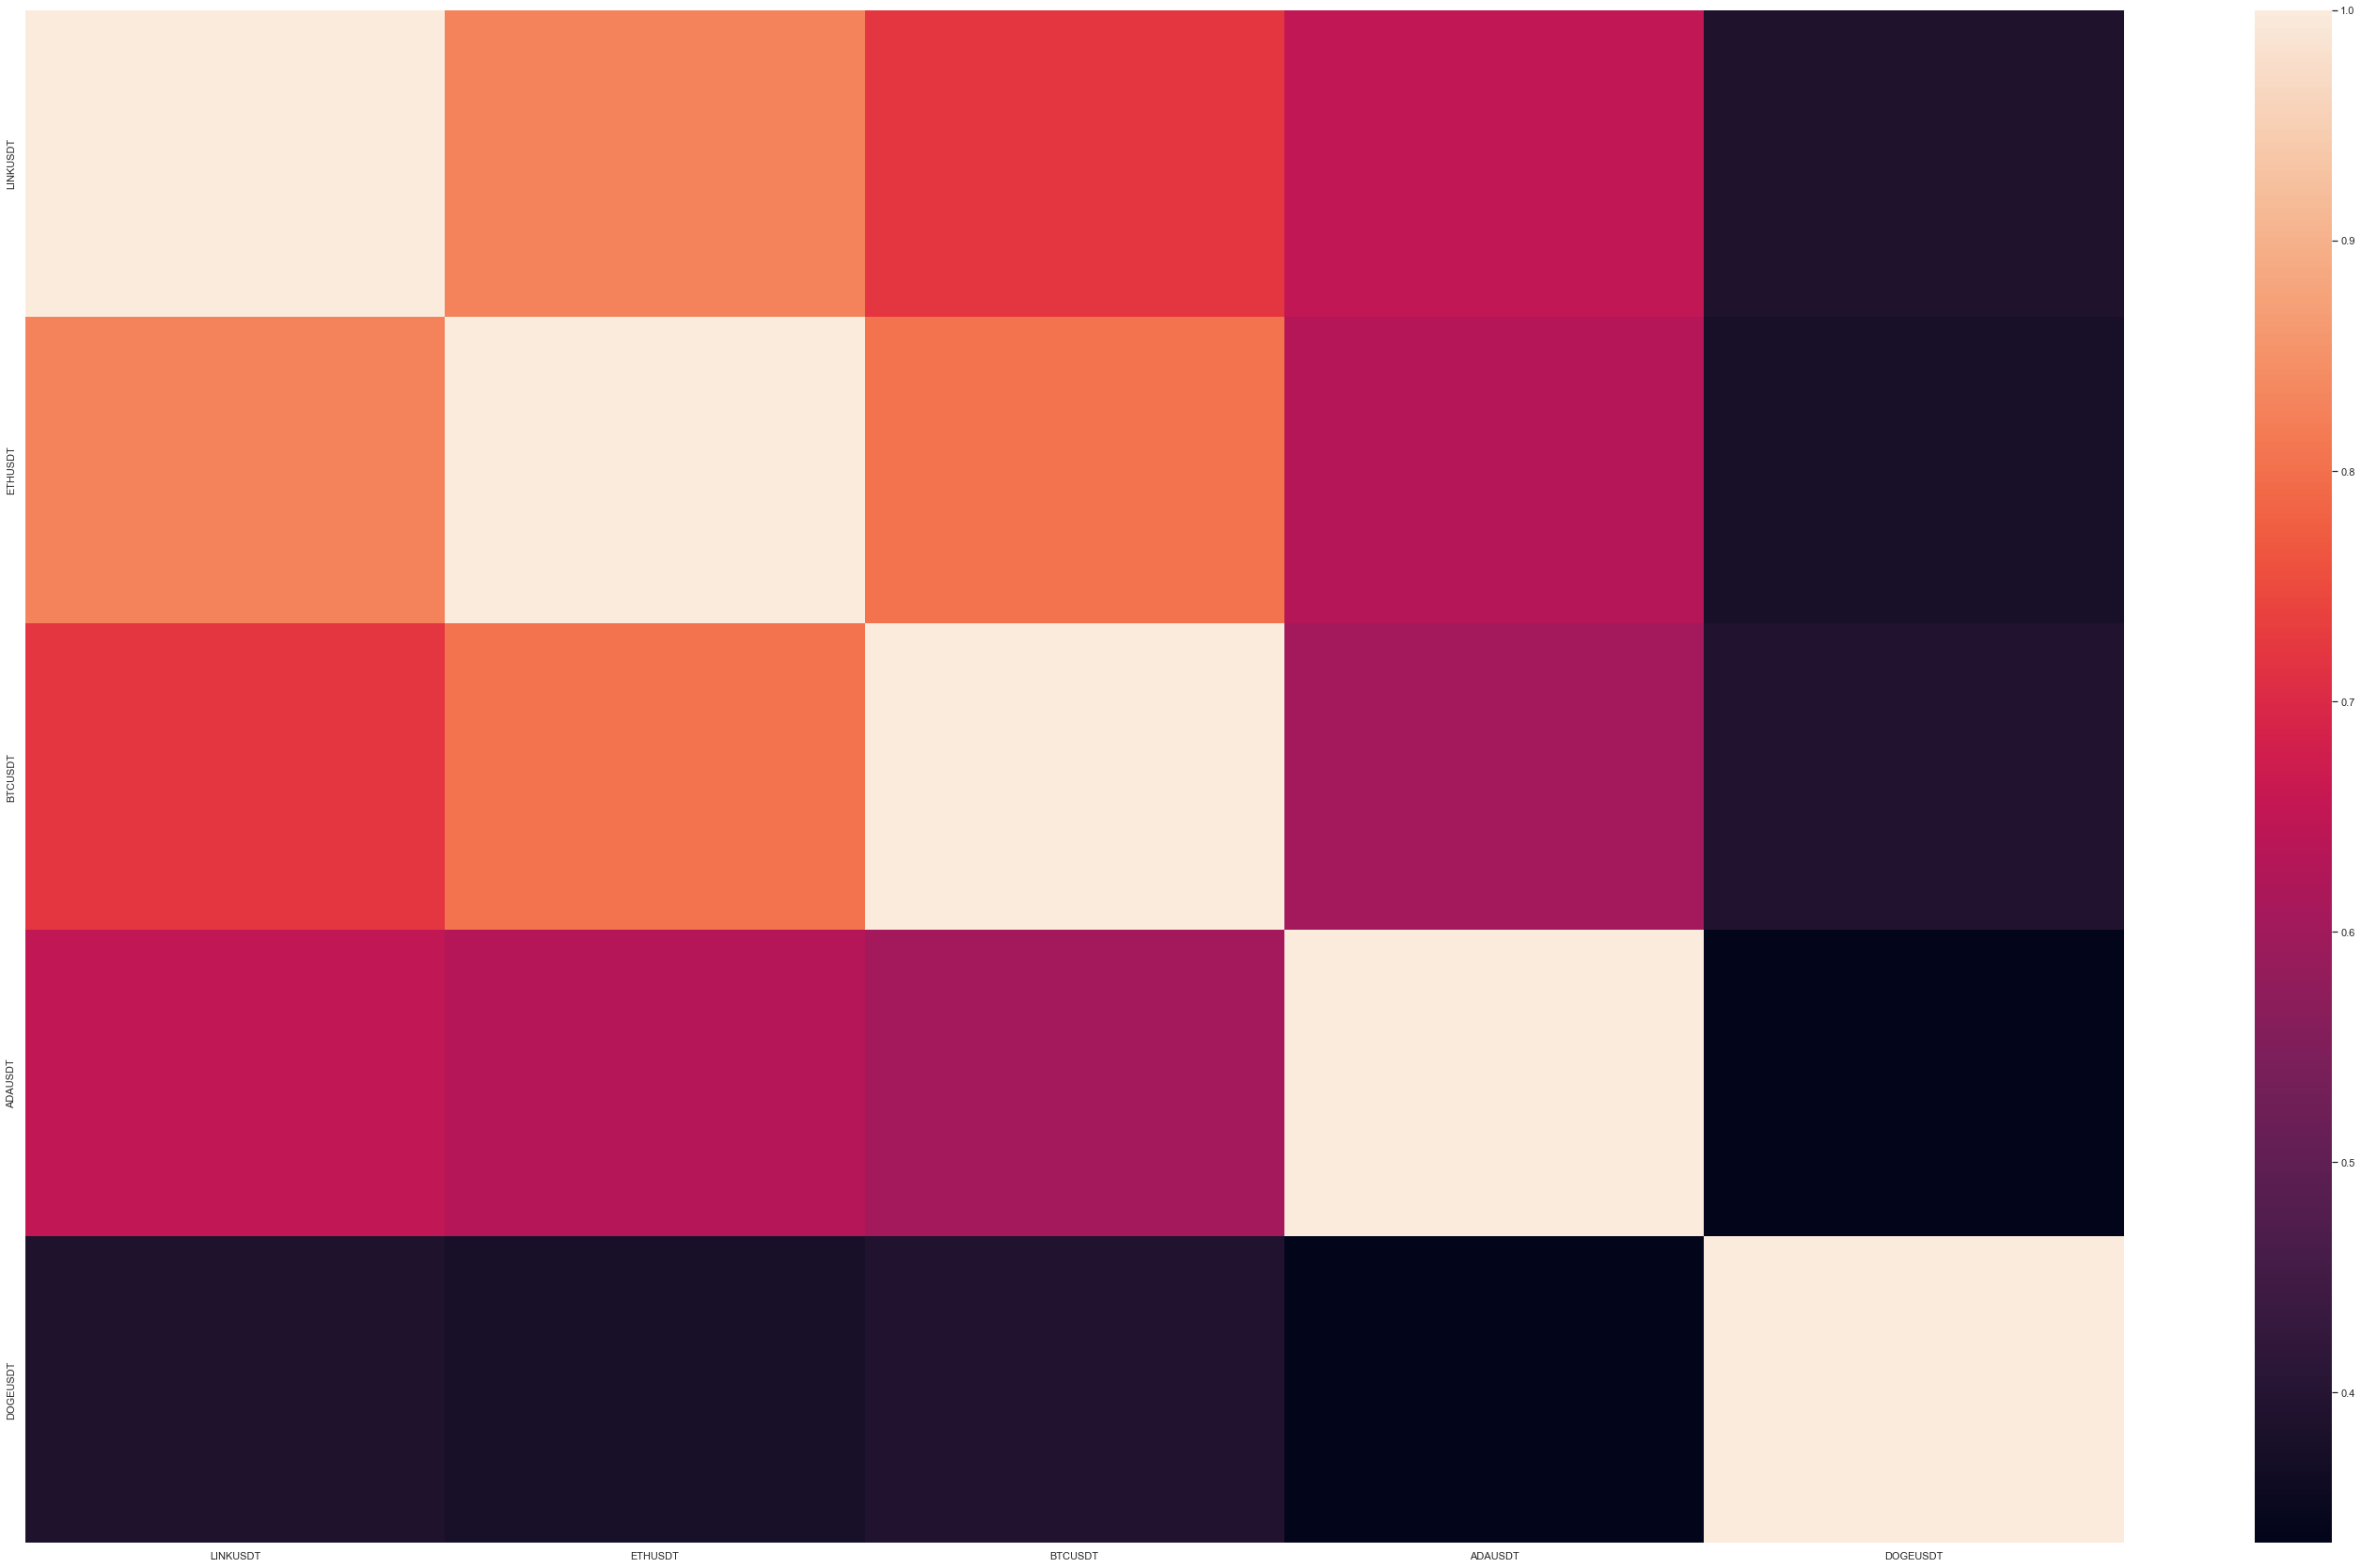

In [23]:
sns.heatmap(logretdf[['LINKUSDT','ETHUSDT','BTCUSDT','ADAUSDT','DOGEUSDT']].corr())

In [24]:
corr_df = logretdf.corr()

In [25]:
#top corr to link
corr_df['LINKUSDT'].nlargest(25)

LINKUSDT      1.000000
LINKUPUSDT    0.978299
LOKAUSDT      0.963274
SCRTUSDT      0.876347
IMXUSDT       0.870524
ETHUSDT       0.827257
BNTUSDT       0.817734
LTCUSDT       0.817242
BANDUSDT      0.812880
NEOUSDT       0.808264
LTCUPUSDT     0.805360
ETHUPUSDT     0.804050
VETUSDT       0.794217
DOTUSDT       0.791778
ZILUSDT       0.784982
BALUSDT       0.783179
DOTUPUSDT     0.782875
BCHUSDT       0.776068
ONTUSDT       0.764462
BTGUSDT       0.762805
DASHUSDT      0.762711
XTZUPUSDT     0.761367
FLMUSDT       0.760156
ZECUSDT       0.759289
XLMUSDT       0.756258
Name: LINKUSDT, dtype: float64

In [26]:
#least corr to link
corr_df['LINKUSDT'].nsmallest(50)

BTCDOWNUSDT     -0.641213
BCHDOWNUSDT     -0.635240
EOSDOWNUSDT     -0.630709
1INCHDOWNUSDT   -0.573079
API3USDT        -0.564793
FILDOWNUSDT     -0.545017
AAVEDOWNUSDT    -0.253200
LINKDOWNUSDT    -0.226503
SUSHIDOWNUSDT   -0.223625
YFIDOWNUSDT     -0.176246
UNIDOWNUSDT     -0.161677
XRPDOWNUSDT     -0.157750
XTZDOWNUSDT     -0.141975
LTCDOWNUSDT     -0.140666
USDCUSDT        -0.130870
DOTDOWNUSDT     -0.109596
ETHDOWNUSDT     -0.098488
BUSDUSDT        -0.093384
PAXUSDT         -0.085985
USDPUSDT        -0.081621
XLMDOWNUSDT     -0.078358
ADADOWNUSDT     -0.068814
TRXDOWNUSDT     -0.059811
SXPDOWNUSDT     -0.039495
USTUSDT         -0.032443
BNBDOWNUSDT     -0.027919
TUSDUSDT        -0.015322
GLMRUSDT         0.069024
NPXSUSDT         0.106788
SUSDUSDT         0.123222
PAXGUSDT         0.136589
HIGHUSDT         0.153557
BNXUSDT          0.172740
SUNUSDT          0.210618
REQUSDT          0.220845
GHSTUSDT         0.221047
GALAUSDT         0.221697
SANTOSUSDT       0.234123
GBPUSDT     

In [27]:
exclude = ['UP','DOWN','BEAR','BULL']

In [28]:
non_lev = [symbol for  symbol in relevant if all(excludes not in symbol for excludes in exclude)]

In [29]:
non_lev

['BTCUSDT',
 'ETHUSDT',
 'BNBUSDT',
 'BCCUSDT',
 'NEOUSDT',
 'LTCUSDT',
 'QTUMUSDT',
 'ADAUSDT',
 'XRPUSDT',
 'EOSUSDT',
 'TUSDUSDT',
 'IOTAUSDT',
 'XLMUSDT',
 'ONTUSDT',
 'TRXUSDT',
 'ETCUSDT',
 'ICXUSDT',
 'VENUSDT',
 'NULSUSDT',
 'VETUSDT',
 'PAXUSDT',
 'BCHABCUSDT',
 'BCHSVUSDT',
 'USDCUSDT',
 'LINKUSDT',
 'WAVESUSDT',
 'BTTUSDT',
 'USDSUSDT',
 'ONGUSDT',
 'HOTUSDT',
 'ZILUSDT',
 'ZRXUSDT',
 'FETUSDT',
 'BATUSDT',
 'XMRUSDT',
 'ZECUSDT',
 'IOSTUSDT',
 'CELRUSDT',
 'DASHUSDT',
 'NANOUSDT',
 'OMGUSDT',
 'THETAUSDT',
 'ENJUSDT',
 'MITHUSDT',
 'MATICUSDT',
 'ATOMUSDT',
 'TFUELUSDT',
 'ONEUSDT',
 'FTMUSDT',
 'ALGOUSDT',
 'USDSBUSDT',
 'GTOUSDT',
 'ERDUSDT',
 'DOGEUSDT',
 'DUSKUSDT',
 'ANKRUSDT',
 'WINUSDT',
 'COSUSDT',
 'NPXSUSDT',
 'COCOSUSDT',
 'MTLUSDT',
 'TOMOUSDT',
 'PERLUSDT',
 'DENTUSDT',
 'MFTUSDT',
 'KEYUSDT',
 'STORMUSDT',
 'DOCKUSDT',
 'WANUSDT',
 'FUNUSDT',
 'CVCUSDT',
 'CHZUSDT',
 'BANDUSDT',
 'BUSDUSDT',
 'BEAMUSDT',
 'XTZUSDT',
 'RENUSDT',
 'RVNUSDT',
 'HCUSDT',
 'HBARUSD

In [30]:
stacked = corr_df.filter(non_lev, axis=1).filter(non_lev, axis=0)

In [31]:
stacked.unstack()

BTCUSDT  BTCUSDT     1.000000
         ETHUSDT     0.803818
         BNBUSDT     0.655529
         NEOUSDT     0.736165
         LTCUSDT     0.790031
                       ...   
ANCUSDT  LOKAUSDT         NaN
         SCRTUSDT         NaN
         API3USDT         NaN
         BTTCUSDT         NaN
         ANCUSDT          NaN
Length: 101761, dtype: float64

In [32]:
unstacked = stacked.unstack()

In [33]:
# top corrolated coins 
unstacked[unstacked < 1].nlargest(50)

HARDUSDT    SCRTUSDT      0.999530
SCRTUSDT    HARDUSDT      0.999530
SANDUSDT    LOKAUSDT      0.999386
LOKAUSDT    SANDUSDT      0.999386
CHRUSDT     SCRTUSDT      0.999099
SCRTUSDT    CHRUSDT       0.999099
SANTOSUSDT  SCRTUSDT      0.998808
SCRTUSDT    SANTOSUSDT    0.998808
UTKUSDT     SCRTUSDT      0.998797
SCRTUSDT    UTKUSDT       0.998797
RENUSDT     SCRTUSDT      0.998331
SCRTUSDT    RENUSDT       0.998331
WANUSDT     SCRTUSDT      0.998090
SCRTUSDT    WANUSDT       0.998090
DNTUSDT     SCRTUSDT      0.998090
SCRTUSDT    DNTUSDT       0.998090
ARDRUSDT    SCRTUSDT      0.997888
SCRTUSDT    ARDRUSDT      0.997888
MFTUSDT     LOKAUSDT      0.997810
LOKAUSDT    MFTUSDT       0.997810
BALUSDT     LOKAUSDT      0.997701
LOKAUSDT    BALUSDT       0.997701
ZILUSDT     SCRTUSDT      0.997683
SCRTUSDT    ZILUSDT       0.997683
AIONUSDT    LOKAUSDT      0.997591
LOKAUSDT    AIONUSDT      0.997591
BAKEUSDT    SCRTUSDT      0.997358
SCRTUSDT    BAKEUSDT      0.997358
FLMUSDT     LOKAUSDT